In [69]:
import pandas as pd
from src.helpers import plot_bar_chart_for_discounts, plot_bar_chart_for_price


konesso_df = pd.read_csv(r"cleaned_data/konesso_cleaned.csv")
pk_df = pd.read_csv(r"cleaned_data/pk_cleaned.csv")
cc_df = pd.read_csv(r"cleaned_data/coffee_cave_cleaned.csv")

In [70]:
pk_df.head()

,product_name,price_old [PLN],new_price [PLN],product_quantity,product_weight
0,"Zestaw kawy ziarnistej Caprisette,",150.80,102.50,4,0.25
1,"Zestaw ziaren kawy Caprisette, w świątecznym ...",160.99,80.50,4,0.25
2,"Zestaw kaw ziarnistych Caprisette TOP,",145.97,87.58,3,0.25
3,"Zestaw kawy mielonej Caprisette,",150.80,102.50,4,0.25
4,"Zestaw kawy mielonej Caprisette, w świąteczny...",160.99,80.50,4,0.25


In [71]:
konesso_df.head()

,product_name,price_old [PLN],price_netto [PLN],new_price [PLN],package_weight [KG]
0,Kawa ziarnista Cornella Barista PRO Premium Gr...,129.99,89.8323,110.49,1.0
1,Kawa ziarnista MRC. Cappuccino Blend,120.00,73.1723,90.00,1.0
2,Kawa ziarnista Bazzara AROMAMORE,132.99,89.7423,110.38,1.0
3,Kawa ziarnista Bazzara GRANCAPPUCCINO,129.99,87.7223,107.89,1.0
4,Kawa ziarnista LaCava Colombia Jairo Arcila,119.00,67.7223,83.30,0.2


In [72]:
cc_df.head()

,product_name,new_price [PLN],product_weight
0,Kawa mielona Brazylia Santos,83.0,1.00
1,Kawa ziarnista Brazylia Santos,83.0,1.00
2,Kawa mielona Brazylia Santos,46.0,0.50
3,Kawa ziarnista Brazylia Santos,46.0,0.50
4,Kawa mielona Brazylia Santos,28.0,0.25


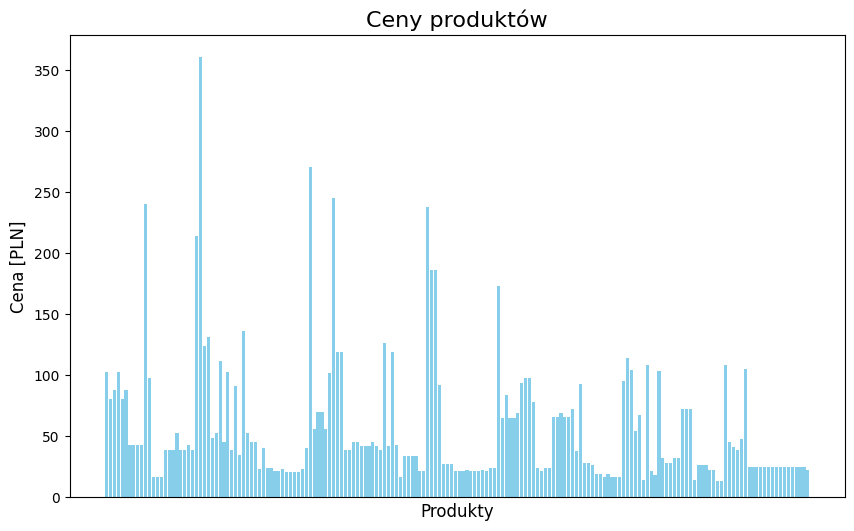

In [73]:
plot_bar_chart_for_price(pk_df, "new_price [PLN]", "skyblue")

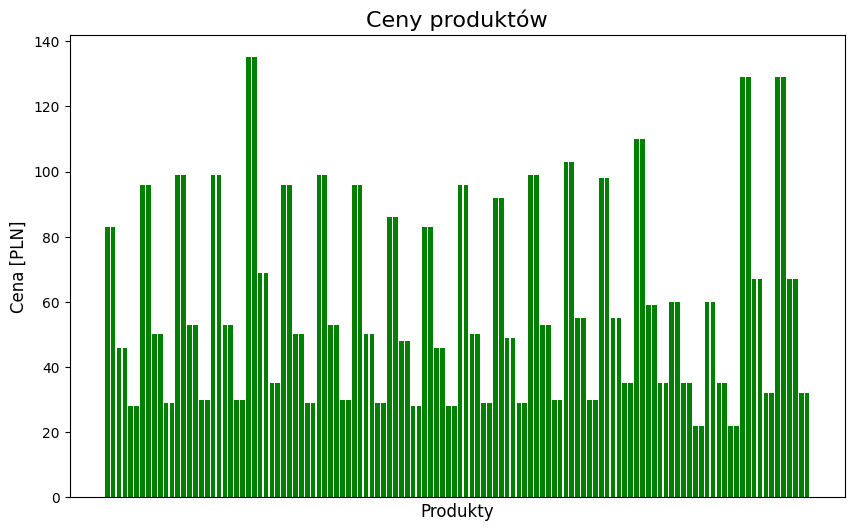

In [74]:
plot_bar_chart_for_price(cc_df, "new_price [PLN]", "green")

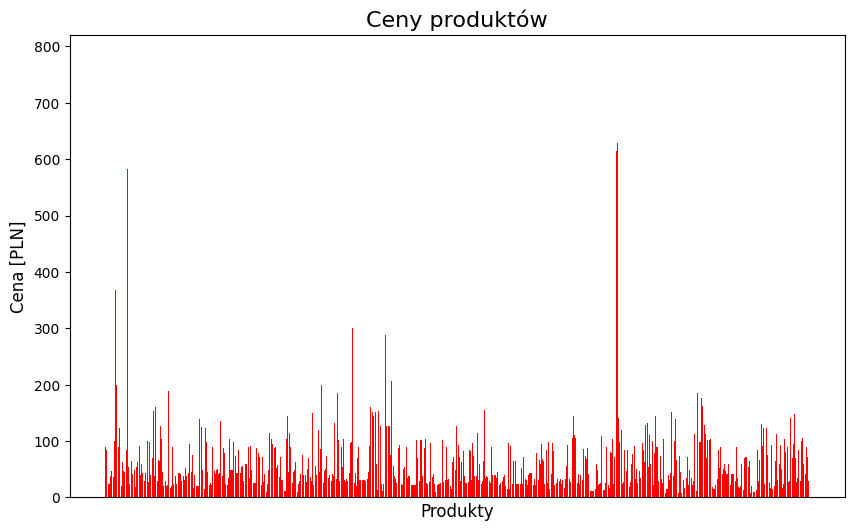

In [75]:
plot_bar_chart_for_price(konesso_df, "new_price [PLN]", "red")

In [76]:
dfs = {
    "konesso_df": konesso_df,
    "cc_df": cc_df,
    "pk_df": pk_df
}


min_max = []
for name, df in dfs.items():
        min_row = df.loc[df["new_price [PLN]"].idxmin()]
        max_row = df.loc[df["new_price [PLN]"].idxmax()]

        min_max.append({
            "df_name": name,
            "min_product": min_row["product_name"],
            "min_price [PLN]": min_row["new_price [PLN]"],
            "max_product": max_row["product_name"],
            "max_price [PLN]": max_row["new_price [PLN]"]
        })


min_max_df = pd.DataFrame(min_max).set_index("df_name")

In [77]:
min_max_df.head()

,min_product,min_price [PLN],max_product,max_price [PLN]
df_name,,,,
konesso_df,LaCava Limy Nitro Cold Bru 200ml,7.19,ZESTAW 6x Kawa ziarnista Bazzara DODICIGRANCRU,780.54
cc_df,Kawa mielona Taka dla Ciebie,22.00,Kawa mielona Etiopia Yirgacheffe,135.00
pk_df,Kapsułki do ekspresu Tchibo Cafissimo / Caffit...,13.53,"Zestaw kawy ziarnistej Single Origin, 3 kg",359.98


In [80]:
dfs = {
    "pk_df": pk_df,
    "konesso_df": konesso_df
}

avg_disc_perc = []
for name, df in dfs.items():
    df["discount_percentage"] = ((df["price_old [PLN]"] - df["new_price [PLN]"]) / df["price_old [PLN]"]) * 100
    avg_discount = df["discount_percentage"].mean()
    avg_disc_perc.append({"df_name": name, "avg_discount_percentage": avg_discount})

avg_disc_perc_df = pd.DataFrame(avg_disc_perc).set_index("df_name")
avg_disc_perc_df.head()

,avg_discount_percentage
df_name,
pk_df,22.347018
konesso_df,21.924925


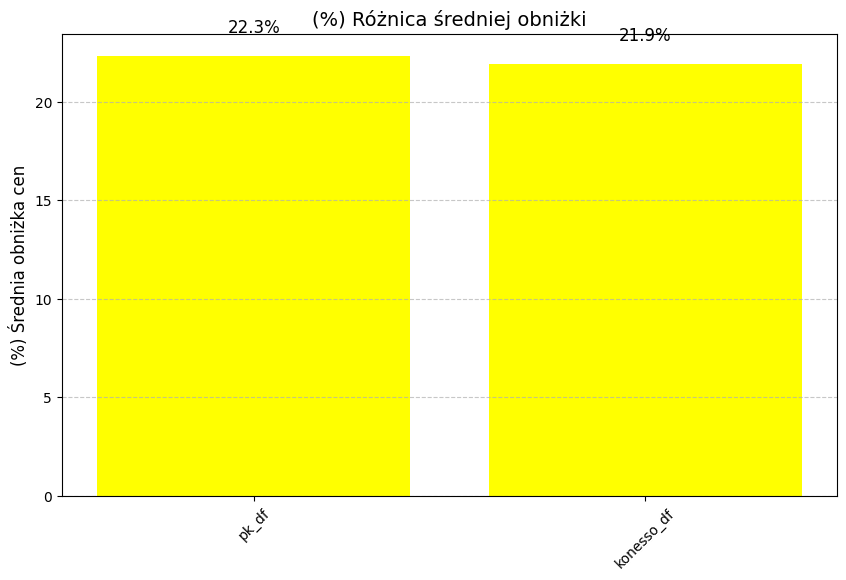

In [79]:
plot_bar_chart_for_discounts(avg_disc_perc_df, "avg_discount_percentage", "yellow")